# Import Libraries 

In [155]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import stats

### Statistical Tests + Time EDA + Feature Engineering

In [211]:
from scipy.stats import ttest_ind

# split the data into IT and Non-IT groups
it_pay = df[df['industry'] == 'IT']['avg_pay']
non_it_pay = df[df['industry'] != 'IT']['avg_pay']

# perform independent t-test
t_stat, p_value = ttest_ind(
    it_pay,
    non_it_pay,
    nan_policy='omit'
)

# print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# decision based on significance level
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the Null Hypothesis (Significant difference in pay)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No significant difference in pay)")

T-statistic: 18.31922307265258
P-value: 2.0802217063504573e-74
Result: Reject the Null Hypothesis (Significant difference in pay)


##### The t-test evaluates whether the mean salary differs between IT and Non-IT roles A p-value below 0.05 indicates a statistically significant difference, suggesting that industry type has a meaningful impact on average pay.

In [212]:
from scipy.stats import f_oneway

# collect avg_pay for each industry
industry_groups = [
    group['avg_pay'].dropna().values
    for name, group in df.groupby('industry')
    if len(group) > 1
]

# perform one-way ANOVA
f_stat, p_value = f_oneway(*industry_groups)

# print results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# decision
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the Null Hypothesis (Significant pay differences across industries)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No significant pay differences across industries)")


F-statistic: 89.90445180143834
P-value: 1.045984964313294e-252
Result: Reject the Null Hypothesis (Significant pay differences across industries)


##### ANOVA tests whether average salary differs across industries a p-value below 0.05 indicates that at least one industry has a significantly different average pay compared to others.

In [213]:
from scipy.stats import chi2_contingency

# create contingency table
contingency_table = pd.crosstab(
    df['industry'],
    df['seniority']
)

print("Contingency Table:\n")
print(contingency_table)

# perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)

# decision
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the Null Hypothesis (Industry and seniority are associated)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No association found)")


Contingency Table:

seniority        Associate  Director  Entry level  Executive  Internship  \
industry                                                                   
BFSI                   196        95          927         96          12   
BPO                     10         4           59          5           2   
Education              525        21          652         52          13   
Government               3         0           12          3           0   
Healthcare               0         1            3          0           0   
Hospitality             49         5          194         73          10   
IT                     542       269         9388        947         228   
Logistics               10         4           64         23           1   
Manufacturing           66        18          490         79          11   
Media                   40        25          291         78          12   
Metals & Mining          5         2           11          1        

##### The Chi-square test evaluates whether industry and seniority level are independent a p-value below 0.05 indicates a significant association, meaning seniority distribution varies across industries.

In [220]:
df['postdate'] = pd.to_datetime(df['postdate'], errors='coerce')

df['month'] = df['postdate'].dt.month

df[['postdate', 'month']].head()


,postdate,month
0,2016-01-29 14:07:03+00:00,1.0
1,2016-01-29 14:07:48+00:00,1.0
2,2015-11-22 22:18:25+00:00,11.0
3,2015-11-22 22:18:26+00:00,11.0
4,2015-11-22 22:18:31+00:00,11.0


### Insight

Extracting month allows us to analyze hiring trends over time and identify seasonal or long-term patterns in job postings.

month
1.0     2141
2.0      714
3.0     3694
4.0      919
5.0     2995
6.0       33
8.0      891
9.0       54
10.0    2318
11.0    4224
12.0    4009
dtype: int64


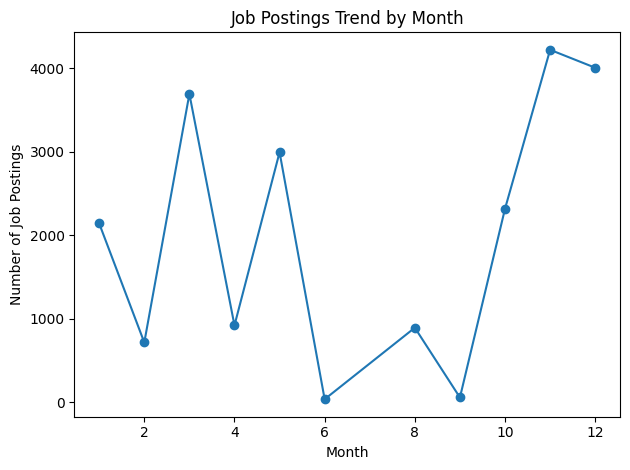

In [218]:
monthly_trend = df.groupby('month').size()

print(monthly_trend)

plt.figure()
monthly_trend.plot(kind='line', marker='o')
plt.title("Job Postings Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.show()


##### Monthly trends help identify seasonal hiring patterns. Peaks may correspond to hiring cycles, while dips may reflect slower recruitment periods.

In [221]:
df['salary_band'] = pd.qcut(
    df['avg_pay'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

df[['avg_pay', 'salary_band']].head()

,avg_pay,salary_band
0,1191878,Very High
1,1036640,Very High
2,318019,Low
3,326000,Medium
4,326000,Medium


##### Helps compare roles and industries using relative salary groups instead of raw values.

In [227]:
metro_cities = [
    'bangalore', 'bengaluru', 'chennai',
    'mumbai', 'pune', 'hyderabad',
    'delhi', 'gurgaon', 'noida'
]

df['is_metro'] = df['joblocation_address'].str.lower().apply(
    lambda x: 'Metro' if any(city in x for city in metro_cities) else 'Non-Metro'
)

df[['joblocation_address', 'is_metro']].head()

,joblocation_address,is_metro
0,Bangalore,Metro
1,Bangalore,Metro
2,Noida,Metro
3,Noida,Metro
4,Noida,Metro


##### Captures geographic salary differences in a simplified, business-friendly way.

In [ ]:
df.to_csv(r"C:\Users\DELL\OneDrive\Desktop\project\EDA job\cleaned_day4.csv")